# Capstone Project - The Battle of Neighborhoods

## Code Notebook

**By :** MOURABIT El Bachir

## 1. Create and Explore Dataset

### 1.1- Imports and Initialization

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
# Import dependencies
import requests # library to handle requests
from bs4 import BeautifulSoup # website scraping librarie 

import numpy as np

import pandas as pd

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't geopy installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't folium installed
import folium # map rendering library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.2


Let's import **Plotly** library that provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python.

Also we need **Cufflinks**, a library for easy interactive Pandas charting with Plotly.

In [2]:
# plotly and associated plotting modules
import plotly as py
import plotly.plotly as ppy
import plotly.graph_objs as go
import plotly.figure_factory as ff
# cufflings and associated plotting modules 
import cufflinks as cf 

cf.set_config_file(world_readable=True)

In [3]:
# Write your Plotly credentials in the function below
py.tools.set_credentials_file(username='#############################', api_key='#############################')

In [4]:
# To display Maps well in chrome :
def embed_map(m, widthVal='100%', heightVal='600px'):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width=widthVal, height=heightVal)

### 1.2- Exploring Paris City Dataset
#### Getting Boroughs

Getting data directly from local .csv file prepared from sources of data explained in the full report

- Source of Paris's Boroughs Dataset : https://opendata.paris.fr/explore/dataset/arrondissements/information/

In [5]:
df_paris_boroughs_base = pd.read_csv('paris_boroughs.csv', delimiter=';', encoding = 'utf8')
df_paris_boroughs_base.head()

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR
0,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"48.8682792225, 2.34280254689","{""type"": ""Polygon"", ""coordinates"": [[[2.351518...",2,4553.938764
1,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"48.86287238, 2.3600009859","{""type"": ""Polygon"", ""coordinates"": [[[2.363828...",3,4519.071982
2,750000012,12,75112,12ème Ardt,Reuilly,750001537,1.631478e+07,24089.666298,"48.8349743815, 2.42132490078","{""type"": ""Polygon"", ""coordinates"": [[[2.413879...",12,24088.038922
3,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018, 2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862
4,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"48.8543414263, 2.35762962032","{""type"": ""Polygon"", ""coordinates"": [[[2.368512...",4,5420.636779


In [6]:
df_paris_boroughs_base[['C_AR', 'L_AROFF', 'Geometry X Y']].head()

,C_AR,L_AROFF,Geometry X Y
0,2,Bourse,"48.8682792225, 2.34280254689"
1,3,Temple,"48.86287238, 2.3600009859"
2,12,Reuilly,"48.8349743815, 2.42132490078"
3,1,Louvre,"48.8625627018, 2.33644336205"
4,4,Hôtel-de-Ville,"48.8543414263, 2.35762962032"


In [7]:
df_paris_boroughs_base[['Latitude', 'Longitude']] = pd.DataFrame(np.array(list(map(lambda x: x.split(","), 
                                                                                   df_paris_boroughs_base['Geometry X Y']))))

In [8]:
df_paris_boroughs_base.dtypes

N_SQ_AR           int64
C_AR              int64
C_ARINSEE         int64
L_AR             object
L_AROFF          object
N_SQ_CO           int64
SURFACE         float64
PERIMETRE       float64
Geometry X Y     object
Geometry         object
OBJECTID          int64
LONGUEUR        float64
Latitude         object
Longitude        object
dtype: object

In [9]:
df_paris_boroughs_base[['Latitude', 'Longitude']] = df_paris_boroughs_base[['Latitude', 'Longitude']].astype(float)
df_paris_boroughs_base.dtypes

N_SQ_AR           int64
C_AR              int64
C_ARINSEE         int64
L_AR             object
L_AROFF          object
N_SQ_CO           int64
SURFACE         float64
PERIMETRE       float64
Geometry X Y     object
Geometry         object
OBJECTID          int64
LONGUEUR        float64
Latitude        float64
Longitude       float64
dtype: object

In [10]:
df_paris_boroughs_base.head()

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR,Latitude,Longitude
0,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"48.8682792225, 2.34280254689","{""type"": ""Polygon"", ""coordinates"": [[[2.351518...",2,4553.938764,48.868279,2.342803
1,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"48.86287238, 2.3600009859","{""type"": ""Polygon"", ""coordinates"": [[[2.363828...",3,4519.071982,48.862872,2.360001
2,750000012,12,75112,12ème Ardt,Reuilly,750001537,1.631478e+07,24089.666298,"48.8349743815, 2.42132490078","{""type"": ""Polygon"", ""coordinates"": [[[2.413879...",12,24088.038922,48.834974,2.421325
3,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018, 2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862,48.862563,2.336443
4,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"48.8543414263, 2.35762962032","{""type"": ""Polygon"", ""coordinates"": [[[2.368512...",4,5420.636779,48.854341,2.357630


In [11]:
df_paris_boroughs = df_paris_boroughs_base.loc[:, ['C_AR', 'L_AROFF', 'Latitude', 'Longitude']]
df_paris_boroughs[['C_AR']] = df_paris_boroughs[['C_AR']].astype(int)
df_paris_boroughs.sort_values("C_AR", inplace=True)
df_paris_boroughs.reset_index(drop=True, inplace=True)
df_paris_boroughs.rename(columns={'C_AR': 'Borough_ID', 'L_AROFF': 'Borough'}, inplace=True)
df_paris_boroughs.head()

,Borough_ID,Borough,Latitude,Longitude
0,1,Louvre,48.862563,2.336443
1,2,Bourse,48.868279,2.342803
2,3,Temple,48.862872,2.360001
3,4,Hôtel-de-Ville,48.854341,2.357630
4,5,Panthéon,48.844443,2.350715


In [12]:
df_paris_boroughs.shape

(20, 4)

#### Getting Neighborhoods

Getting data directly from local .json file prepared from sources of data explained in the full report

- Source of Paris's Neighborhoods Dataset : https://opendata.paris.fr/explore/dataset/quartier_paris/information/

In [13]:
with open('paris_neighborhoods.json') as json_data:
    paris_neighborhoods_data = json.load(json_data)

In [14]:
# define the dataframe columns
column_names = ['Borough_ID', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
paris_neighborhoods_base = pd.DataFrame(columns=column_names)
paris_neighborhoods_base

,Borough_ID,Neighborhood,Latitude,Longitude


In [15]:
# Obtain Paris's neighborhoods Dataframe from data extracted from Json

for data in paris_neighborhoods_data:
    borough_id = data['fields']['nar'] 
    neighborhood_name = data['fields']['nom_quart']
        
    neighborhood_latlon = data['fields']['geom_x_y']
    neighborhood_lat = neighborhood_latlon[0]
    neighborhood_lon = neighborhood_latlon[1]
        
    paris_neighborhoods_base = paris_neighborhoods_base.append({'Borough_ID': borough_id,
                                                                'Neighborhood': neighborhood_name,
                                                                'Latitude': neighborhood_lat,
                                                                'Longitude': neighborhood_lon}, ignore_index=True)

In [16]:
paris_neighborhoods_base.head()

,Borough_ID,Neighborhood,Latitude,Longitude
0,17,BATIGNOLLES - CARDINET,48.886524,2.320896
1,14,JEAN MOULIN - PORTE D'ORLEANS,48.824042,2.324701
2,18,LA CHAPELLE - MARX DORMOY,48.890107,2.362578
3,16,MUETTE SUD,48.855618,2.278026
4,3,ARCHIVES,48.859194,2.363202


In [17]:
paris_neighborhoods_base.shape

(124, 4)

##### Preparing data to join Boroughs Dataframe with Neighborhood Dataframe

In [18]:
paris_neighborhoods_base.dtypes

Borough_ID       object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [19]:
paris_neighborhoods_base[['Borough_ID']] = paris_neighborhoods_base[['Borough_ID']].astype(int)
paris_neighborhoods_base.dtypes

Borough_ID        int32
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

##### Join Boroughs Dataframe with Neighborhood Dataframe

In [20]:
paris_neighborhoods = df_paris_boroughs.loc[:, ['Borough_ID', 'Borough']]
paris_neighborhoods = paris_neighborhoods.join(paris_neighborhoods_base.set_index('Borough_ID'), 
                                               on='Borough_ID')

In [21]:
paris_neighborhoods.sort_values("Borough_ID", inplace=True)
paris_neighborhoods.reset_index(drop=True, inplace=True)
paris_neighborhoods.drop(columns="Borough_ID", inplace=True)
paris_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Louvre,PALAIS ROYAL,48.864661,2.336308
1,Louvre,LES HALLES,48.862289,2.344899
2,Louvre,SAINT - GERMAIN L'AUXERROIS,48.860650,2.334911
3,Louvre,PLACE VENDOME,48.867018,2.328579
4,Bourse,SENTIER - BONNE NOUVELLE,48.868927,2.348039


In [22]:
print("Number of Boroughs in Paris : {}".format(paris_neighborhoods["Borough"].unique().shape[0]))

Number of Boroughs in Paris : 20


In [23]:
print("Number of Boroughs in Paris : {}".format((paris_neighborhoods['Neighborhood'] + 
                                                        ", " + 
                                                        paris_neighborhoods['Borough']).unique().shape[0]))

Number of Boroughs in Paris : 124


##### Use geopy library to get the latitude and longitude values of Paris.

In [24]:
# Paris latitude and longitude values
address = 'Paris'

geolocator = Nominatim(user_agent="App-Paris")
paris_location = geolocator.geocode(address)
paris_latitude = paris_location.latitude
paris_longitude = paris_location.longitude
print(paris_latitude, paris_longitude)

paris_boroughs_geo = r'paris_boroughs.geojson'
paris_neighborhoods_geo = r'paris_neighborhoods.geojson'

48.8566101 2.3514992


##### Create a map representing Paris's boroughs in a Tabulation Areas mode

In [25]:
# let Folium determine the scale.
paris_map = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# Creating Boroughs Tabulation Areas 

with open(paris_boroughs_geo) as json_data:
    paris_boroughs_popups = json.load(json_data)

for feature in paris_boroughs_popups['features']:
    
    # Create a Borough Tabulation Area
    popup = folium.GeoJson(feature['geometry'],
                           style_function=lambda feature: {
                                'color': 'white',
                                'weight': 2,
                                'fillColor': '#D6877C',
                                'fillOpacity': 0.6
                            })
    
    # Create Borough Popup for every Tabulation Area
    popup.add_child(folium.Popup(feature['properties']['l_ar']))
    popup.add_to(paris_map)

# Display Paris Map    
embed_map(paris_map)

##### Create a map representing Paris's neighborhoods in a Tabulation Areas mode

In [26]:
# let Folium determine the scale.
paris_map = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# Creating Neighborhoods Tabulation Areas 

with open(paris_neighborhoods_geo) as json_data:
    paris_neighborhoods_popups = json.load(json_data)
    
    
for feature in paris_neighborhoods_popups['features']:
    
    # Create a Neighborhood Tabulation Area
    popup = folium.GeoJson(feature['geometry'],
                           style_function=lambda feature: {
                                'color': 'white',
                                'weight': 2,
                                'fillColor': '#D6877C',
                                'fillOpacity': 0.6
                            })
    
    # Create Neighborhood Popup for every Tabulation Area
    popup.add_child(folium.Popup(feature['properties']['nom_quart'], parse_html=True))
    popup.add_to(paris_map)

    
# Display Paris Map    
embed_map(paris_map)

### 1.3- Exploring New York City Dataset

The New York City dataset used in labs contains 5 boroughs and 306 neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

The dataset exists for free on the web. Feel free to try to find this dataset at link : https://geo.nyu.edu/catalog/nyu_2451_34572

Import New York City boroughs and neighborhoods data from JSON file

In [27]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [28]:
newyork_neighborhoods_data = newyork_data['features']

In [29]:
newyork_neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

#### Constructing New York's neighborhoods base Dataframe

In [30]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork_neighborhoods = pd.DataFrame(columns=column_names)

In [31]:
newyork_neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [32]:
# Obtain New York's neighborhoods Dataframe from data extracted from Json

for data in newyork_neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_neighborhoods = newyork_neighborhoods.append({'Borough': borough,
                                                          'Neighborhood': neighborhood_name,
                                                          'Latitude': neighborhood_lat,
                                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [33]:
newyork_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [34]:
print("Number of Boroughs in New York City : {}".format(newyork_neighborhoods["Borough"].unique().shape[0]))

Number of Boroughs in New York City : 5


In [36]:
print("Number of Boroughs in New York City : {}".format((newyork_neighborhoods['Neighborhood'] + 
                                                        ", " + 
                                                        newyork_neighborhoods['Borough']).unique().shape[0]))

Number of Boroughs in New York City : 306


#### Boroughs & Neighborhoods Visualization : Tabulation Areas

To visualize tabulation areas for both Boroughs & Neighborhoods we will use geojson datasets :

- Geojson file to plot boroughs tabulation areas : https://geo.nyu.edu/catalog/nyu-2451-34561
- Geojson file to plot neighborhoods tabulation areas : https://geo.nyu.edu/catalog/nyu-2451-34490

##### Use geopy library to get the latitude and longitude values of New York City.

In [37]:
# New York latitude and longitude values
address = 'New York City, NY'

geolocator = Nominatim(user_agent="App-NewYork")
newyork_location = geolocator.geocode(address)
newyork_latitude = newyork_location.latitude
newyork_longitude = newyork_location.longitude
print(newyork_latitude, newyork_longitude)

newyork_boroughs_geo = r'newyork_boroughs.geojson'
newyork_neighborhoods_geo = r'newyork_neighborhoods.geojson'

40.7308619 -73.9871558


##### Create a map representing New York's boroughs in a Tabulation Areas mode

In [38]:
# let Folium determine the scale.
newyork_map = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)

# Creating Boroughs Tabulation Areas 

with open(newyork_boroughs_geo) as json_data:
    newyork_boroughs_popups = json.load(json_data)

for feature in newyork_boroughs_popups['features']:
    
    # Create a Borough Tabulation Area
    popup = folium.GeoJson(feature['geometry'],
                           style_function=lambda feature: {
                                'color': 'white',
                                'weight': 2,
                                'fillColor': '#8CABD4',
                                'fillOpacity': 0.6
                            })
    
    # Create Borough Popup for every Tabulation Area
    popup.add_child(folium.Popup(feature['properties']['BoroName']))
    popup.add_to(newyork_map)

# Display New York City Map    
embed_map(newyork_map)

##### Create a map representing New York's neighborhoods in a Tabulation Areas mode

In [39]:
# let Folium determine the scale.
newyork_map = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=10)

# Creating Neighborhoods Tabulation Areas 

with open(newyork_neighborhoods_geo) as json_data:
    newyork_neighborhoods_popups = json.load(json_data)

for feature in newyork_neighborhoods_popups['features']:
    
    # Create a Neighborhood Tabulation Area
    popup = folium.GeoJson(feature['geometry'],
                           style_function=lambda feature: {
                                'color': 'white',
                                'weight': 2,
                                'fillColor': '#8CABD4',
                                'fillOpacity': 0.6
                            })
    
    # Create Neighborhood Popup for every Tabulation Area
    popup.add_child(folium.Popup(feature['properties']['ntaname'] + ", " + feature['properties']['boroname'], 
                                 parse_html=True))
    popup.add_to(newyork_map)

# Display New York City Map    
embed_map(newyork_map)

## 2- Exploring Venues 
### 2.1- General steps

First, let's create the needed parameters to create foursquare venues exploring requests

In [40]:
# type your answer here
CLIENT_ID = '############################################' # your Foursquare ID
CLIENT_SECRET = '############################################' # your Foursquare Secret
VERSION = '20180604'

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

##### Let's create a function to get venues of all the neighborhoods in a specific city

we will get the top 100 venues that are in  a specific neighborhood within a radius of 500 meters.

In [41]:
import time

def getNearbyVenues(boroughs, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        # Wait for 2 seconds
        time.sleep(2)
        
        print(borough + ", " + name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 2.2- Exploring Paris City Venues

Now we write the code to run the **getNearbyVenues** function on each neighborhood in Paris and we create a new dataframe called *paris_venues*. And memorising the venues to use them other time

In [42]:
paris_venues = getNearbyVenues(paris_neighborhoods['Borough'],paris_neighborhoods['Neighborhood'], 
                               paris_neighborhoods['Latitude'], paris_neighborhoods['Longitude'])

paris_venues.to_csv('paris_venues.csv', index=False)

After memorising venues in a CSV file, we will use **paris_venues.csv** to get venues for other times because searching venues with foursquare take a lot of time.

In [43]:
paris_venues = pd.read_csv('paris_venues.csv')

Peview of Paris neighborhoods' venues.

In [44]:
paris_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,PALAIS ROYAL,48.864661,2.336308,Jardin du Palais Royal,48.864941,2.337728,Garden
1,Louvre,PALAIS ROYAL,48.864661,2.336308,Sanukiya,48.864713,2.334059,Udon Restaurant
2,Louvre,PALAIS ROYAL,48.864661,2.336308,Palais Royal,48.863758,2.337121,Historic Site
3,Louvre,PALAIS ROYAL,48.864661,2.336308,Ellsworth,48.865528,2.337057,French Restaurant
4,Louvre,PALAIS ROYAL,48.864661,2.336308,Comédie-Française,48.863088,2.336612,Theater


In [45]:
paris_venues.shape

(7849, 8)

Get the number of unique venues types in Paris.

In [46]:
print(paris_venues['Venue Category'].unique().shape[0])

324


#### Paris venues Map visualization

In [47]:
# create map
map_paris_venues = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)


map_paris_venues.choropleth(
    geo_data=paris_neighborhoods_geo,
    fill_color='#8CABD4',
    line_color='White',
    fill_opacity=0.5, 
    line_opacity=0.7,
    line_weight=2,
    legend_name='Paris Neighborhoods Tabulation Areas',
    reset=True
)

# add markers to map
for lat, lng, venue, category in zip(paris_venues['Venue Latitude'], paris_venues['Venue Longitude'], 
                                     paris_venues['Venue'], paris_venues['Venue Category']):
    label = '{}, {}'.format(category, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_paris_venues)  

       
embed_map(map_paris_venues)

### 2.3- Exploring New York City Venues

Now we write the code to run the **getNearbyVenues** function on each neighborhood in New York City and we create a new dataframe called *newyork_venues*. And memorising the venues to use them other time

In [48]:
newyork_venues = getNearbyVenues(newyork_neighborhoods['Borough'], newyork_neighborhoods['Neighborhood'], 
                                 newyork_neighborhoods['Latitude'], newyork_neighborhoods['Longitude'])

newyork_venues.to_csv('newyork_venues.csv', index=False)

After memorising venues in a CSV file, we will use **newyork_venues.csv** to get venues for other times because searching venues with foursquare take a lot of time.

In [49]:
newyork_venues = pd.read_csv('newyork_venues.csv')

Peview of Paris neighborhoods' venues.

In [50]:
newyork_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Bronx,Wakefield,40.894705,-73.847201,Rite Aid,40.896521,-73.844680,Pharmacy
2,Bronx,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898276,-73.850381,Caribbean Restaurant
3,Bronx,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Bronx,Wakefield,40.894705,-73.847201,Dunkin Donuts,40.890631,-73.849027,Donut Shop


In [51]:
newyork_venues.shape

(10265, 8)

Get the number of unique venues types in New York City.

In [52]:
print(newyork_venues['Venue Category'].unique().shape[0])

429


#### New York City venues Map visualization

In [53]:
# create map
map_newyork_venues = folium.Map(location=[newyork_latitude-0.028, newyork_longitude], zoom_start=11)


map_newyork_venues.choropleth(
    geo_data=newyork_neighborhoods_geo,
    fill_color='#8CABD4',
    line_color='White',
    fill_opacity=0.5, 
    line_opacity=0.7,
    line_weight=2,
    legend_name='New York City Neighborhoods Tabulation Areas',
    reset=True
)

# add markers to map
for lat, lng, venue, category in zip(newyork_venues['Venue Latitude'], newyork_venues['Venue Longitude'], 
                                     newyork_venues['Venue'], newyork_venues['Venue Category']):
    label = '{}, {}'.format(category, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_newyork_venues)  

       
embed_map(map_newyork_venues, heightVal='825px')

Venues differences between Paris & New York. New york has more venues than Paris.

In [54]:
# Venues differences between Paris & New York
print("Venues differences between Paris & New York : {} venues".format(newyork_venues.shape[0] - paris_venues.shape[0]))

Venues differences between Paris & New York : 2416 venues


## 3- Data Analytics & Clustering

### 3.1- General processing

After manually group Foursquare's venues categories found in Paris and New York City, we stored the new global categories of venues in .csv file.

So this is an example of global categories and corresponding venues.

In [55]:
venues_parent_categories = pd.read_csv('venues_categories.csv', encoding = 'utf8')
venues_parent_categories.head()

,BAR_CLUB,RESTAURANT,SERVICES,LEISURE_SPORTS,CULTURAL_SCHOOLS,PARKS_NATURE_RURAL,TRANSPORT_INFRASTRUCTURE,RESIDENTIAL
0,Street Food Gathering,Argentinian Restaurant,Print Shop,Basketball Court,Movie Theater,Park,Bus Station,Residential Building (Apartment / Condo)
1,Rock Club,Israeli Restaurant,Big Box Store,Gym / Fitness Center,Public Art,Trail,Harbor / Marina,Neighborhood
2,Gay Bar,Colombian Restaurant,Shop & Service,Gym,Art Gallery,Garden,Bus Line,Indoor Play Area
3,Poke Place,Burmese Restaurant,Tourist Information Center,Bowling Alley,Historic Site,Plaza,Gas Station,Playground
4,Adult Boutique,Czech Restaurant,Entertainment Service,Yoga Studio,Performing Arts Venue,Scenic Lookout,Train Station,Building


Collecting differents global categories of venues in a lists.

In [56]:
# Export columns to python lists
venues_BAR_CLUB = venues_parent_categories.BAR_CLUB.tolist()
venues_BAR_CLUB = [x for x in venues_BAR_CLUB if str(x) != 'nan']

venues_RESTAURANT = venues_parent_categories.RESTAURANT.tolist()
venues_RESTAURANT = [x for x in venues_RESTAURANT if str(x) != 'nan']

venues_SERVICES = venues_parent_categories.SERVICES.tolist()
venues_SERVICES = [x for x in venues_SERVICES if str(x) != 'nan']

venues_LEISURE_SPORTS = venues_parent_categories.LEISURE_SPORTS.tolist()
venues_LEISURE_SPORTS = [x for x in venues_LEISURE_SPORTS if str(x) != 'nan']

venues_CULTURAL_SCHOOLS = venues_parent_categories.CULTURAL_SCHOOLS.tolist()
venues_CULTURAL_SCHOOLS = [x for x in venues_CULTURAL_SCHOOLS if str(x) != 'nan']

venues_PARKS_NATURE_RURAL = venues_parent_categories.PARKS_NATURE_RURAL.tolist()
venues_PARKS_NATURE_RURAL = [x for x in venues_PARKS_NATURE_RURAL if str(x) != 'nan']

venues_TRANSPORT_INFRASTRUCTURE = venues_parent_categories.TRANSPORT_INFRASTRUCTURE.tolist()
venues_TRANSPORT_INFRASTRUCTURE = [x for x in venues_TRANSPORT_INFRASTRUCTURE if str(x) != 'nan']

venues_RESIDENTIAL = venues_parent_categories.RESIDENTIAL.tolist()
venues_RESIDENTIAL = [x for x in venues_RESIDENTIAL if str(x) != 'nan']

Function to transform foursquare default categories to my custom categories that englobe differents venues basic categories

In [57]:
def encode_venues_categories(dataframe):
    res = []
    for index, row in dataframe.iterrows():
        if row["Venue Category"] in (venues_BAR_CLUB):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        1, 0, 0, 0, 0, 0, 0, 0, 1])
        elif row["Venue Category"] in (venues_RESTAURANT):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 1, 0, 0, 0, 0, 0, 0, 1])
        elif row["Venue Category"] in (venues_SERVICES):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 1, 0, 0, 0, 0, 0, 1])
        elif row["Venue Category"] in (venues_LEISURE_SPORTS):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 0, 1, 0, 0, 0, 0, 1])
        elif row["Venue Category"] in (venues_CULTURAL_SCHOOLS):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 0, 0, 1, 0, 0, 0, 1])
        elif row["Venue Category"] in (venues_PARKS_NATURE_RURAL):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 0, 0, 0, 1, 0, 0, 1])
        elif row["Venue Category"] in (venues_TRANSPORT_INFRASTRUCTURE):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 0, 0, 0, 0, 1, 0, 1])
        elif row["Venue Category"] in (venues_RESIDENTIAL):
            res.append([row["Borough"], row["Neighborhood"], row["Neighborhood Latitude"], row["Neighborhood Longitude"],
                        row["Venue Latitude"], row["Venue Longitude"],
                        0, 0, 0, 0, 0, 0, 0, 1, 1])
        else:
            print(row["Venue Category"])
    return res

Function to modify a specific parts in a pie graph that we will use

In [58]:
def calculateTextpositions(values):
    # Do not display percentages < 5%
    return list(map(lambda v: 'outside' if float(v) < 0.054 else 'auto', values))

Impotant columns to analyse & cluster the dataset

In [59]:
columns_encoded = ["Borough", "Neighborhood", "Neighborhood Latitude", "Neighborhood Longitude", 
                                          "Venue Latitude", "Venue Longitude", 
                                          "Bars and Clubs", "Restaurants", "Services", "Leisure and Sports",
                                          "Education and Culture", "Nature and Parks", "Transportation",
                                          "Residential", "Total Venues"]

### 3.2- Venues Categories Description

In [60]:
venues_parent_categories.columns = columns_encoded[6:-1]

venues_larger_categories = venues_parent_categories.count().reset_index()
venues_larger_categories.columns=["Global Category", "Number of Unique Sub-Categories"]

In [61]:
venues_larger_categories

,Global Category,Number of Unique Sub-Categories
0,Bars and Clubs,73
1,Restaurants,126
2,Services,146
3,Leisure and Sports,52
4,Education and Culture,50
5,Nature and Parks,36
6,Transportation,31
7,Residential,7


In [62]:
bar_venues_desc = go.Bar(x=venues_larger_categories["Global Category"], 
                         y=venues_larger_categories["Number of Unique Sub-Categories"],
                         name="Number of Venues Sub-Categories for each larger Categorie")

layout = go.Layout(barmode='overlay', title="Number of Venues Sub-Categories for each larger Categorie")
fig = go.Figure(data=[bar_venues_desc], layout=layout)

ppy.iplot(fig, filename='venues_categories_desc')

### 3.3- Paris Analytics

In [63]:
# Create encoded venues dataframe
paris_encoded_venues = pd.DataFrame(encode_venues_categories(paris_venues), 
                                 columns=columns_encoded)

In [64]:
paris_encoded_venues.shape

(7849, 15)

In [65]:
paris_venues.shape

(7849, 8)

In [66]:
paris_encoded_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Total Venues
0,Louvre,PALAIS ROYAL,48.864661,2.336308,48.864941,2.337728,0,0,0,0,0,1,0,0,1
1,Louvre,PALAIS ROYAL,48.864661,2.336308,48.864713,2.334059,0,1,0,0,0,0,0,0,1
2,Louvre,PALAIS ROYAL,48.864661,2.336308,48.863758,2.337121,0,0,0,0,1,0,0,0,1
3,Louvre,PALAIS ROYAL,48.864661,2.336308,48.865528,2.337057,0,1,0,0,0,0,0,0,1
4,Louvre,PALAIS ROYAL,48.864661,2.336308,48.863088,2.336612,0,0,0,0,1,0,0,0,1


In [67]:
columns_to_drop_sum = ['Neighborhood Latitude', 'Neighborhood Longitude',
                        'Venue Latitude', 'Venue Longitude']

columns_to_drop_mean = columns_to_drop_sum + ['Total Venues']


paris_encoded_venues_droped_sum = paris_encoded_venues.drop(columns=columns_to_drop_sum)
paris_encoded_venues_droped_mean = paris_encoded_venues.drop(columns=columns_to_drop_mean)

# Create encoded grouped venues dataframe for Bar graphical Analysis
paris_encoded_venues_grouped_sum = paris_encoded_venues_droped_sum.groupby(['Borough', 'Neighborhood']).sum().reset_index()

# Prepare encoded grouped venues dataframe for KMeans clustering
paris_encoded_venues_grouped_mean = paris_encoded_venues_droped_mean.groupby(['Borough', 'Neighborhood']).mean().reset_index()


In [68]:
paris_encoded_venues_grouped_sum.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Total Venues
0,Batignolles-Monceau,BATIGNOLLES - CARDINET,22,57,17,2,1,1,0,0,100
1,Batignolles-Monceau,CHAMPERRET - BERTHIER,11,31,21,3,1,2,2,0,71
2,Batignolles-Monceau,COURCELLES - WAGRAM,12,42,16,2,0,3,0,0,75
3,Batignolles-Monceau,EPINETTES - BESSIERES,0,9,5,1,0,1,5,0,21
4,Batignolles-Monceau,LA FOURCHE - GUY MOQUET,7,15,10,2,0,2,1,0,37


In [69]:
paris_encoded_venues_grouped_sum.shape

(123, 11)

### General analysis for Paris's neighborhoods & venues

#### Number of venues per range of neighborhoods in Paris

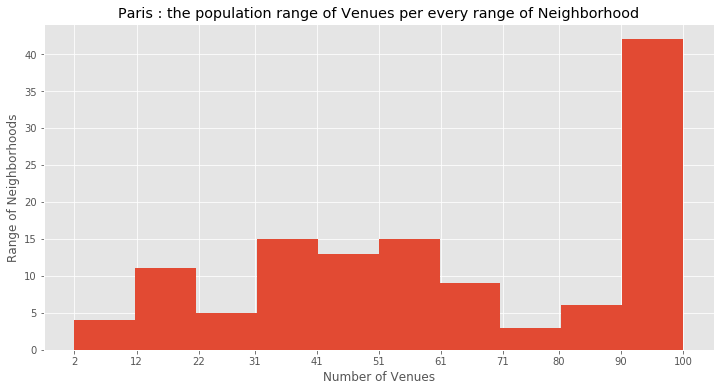

In [70]:
count, bin_edges = np.histogram(paris_encoded_venues_grouped_sum['Total Venues'])
bin_edges_rounded = np.round(bin_edges)

paris_encoded_venues_grouped_sum['Total Venues'].plot(kind='hist', 
             figsize=(12, 6), # pass a tuple (x, y) size
             xticks=bin_edges_rounded
             )

plt.title('Paris : the population range of Venues per every range of Neighborhood')
plt.xlabel('Number of Venues')
plt.ylabel('Range of Neighborhoods')

plt.show()

#### Distribution of neighborhoods' numbers of bars & clubs in Paris

In [71]:
# Index is occuring that number of times
# number of Bars and Clubs (index) is occurring that number of times (values)
# number of Bars and Clubs / number of neighborhoods
paris_bar_club_dist = paris_encoded_venues_grouped_sum['Bars and Clubs'].value_counts(sort=False)

In [72]:
paris_bar_club_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_bar_clubb',
                         xTitle='Number of Bars and Clubs', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Bars and Clubs per every range of Neighborhood')

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

#### Distribution of neighborhoods' numbers of restaurants in Paris

In [ ]:
# Index is occuring that number of times
# number of restaurants (index) is occurring that number of times (values)
# number of restaurants / number of neighborhoods
paris_restaurant_dist = paris_encoded_venues_grouped_sum['Restaurants'].value_counts(sort=False)

In [ ]:
paris_restaurant_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_restaurant',
                         xTitle='Number of Restaurants', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Restaurants per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of services venues in Paris

In [ ]:
# Index is occuring that number of times
# number of Services venues (index) is occurring that number of times (values)
# number of Services venues / number of neighborhoods
paris_service_dist = paris_encoded_venues_grouped_sum['Services'].value_counts(sort=False)

In [ ]:
paris_service_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_services',
                         xTitle='Number of Services venues', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Services venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of leisure & sports venues in Paris

In [ ]:
# Index is occuring that number of times
# number of Leisure & Sports venues (index) is occurring that number of times (values)
# number of Leisure & Sports venues / number of neighborhoods
paris_leisure_sport_dist = paris_encoded_venues_grouped_sum['Leisure and Sports'].value_counts(sort=False)

In [73]:
paris_leisure_sport_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_leisure_sport',
                         xTitle='Number of Leisure & Sports venues', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Venues for Leisure and Sports per every range of Neighborhood')

NameError: name 'paris_leisure_sport_dist' is not defined

#### Distribution of neighborhoods' numbers of Educational & Cultural venues in Paris

In [ ]:
# Index is occuring that number of times
# number of Educational & Cultural venues (index) is occurring that number of times (values)
# number of Educational & Cultural venues / number of neighborhoods
paris_education_culture_dist = paris_encoded_venues_grouped_sum['Education and Culture'].value_counts(sort=False)

In [ ]:
paris_education_culture_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_education_culture',
                         xTitle='Number of Educational & Cultural venues', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Educational and Cultural venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of natural venues in Paris

In [74]:
# Index is occuring that number of times
# number of Natural venues (index) is occurring that number of times (values)
# number of Natural venues / number of neighborhoods
paris_nature_park_dist = paris_encoded_venues_grouped_sum['Nature and Parks'].value_counts(sort=False)

In [75]:
paris_nature_park_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_nature_park',
                         xTitle='Number of Natural venues', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Natural venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of transports & infrastructures venues in Paris

In [76]:
# Index is occuring that number of times
# number of Transports and infrastructures venues (index) is occurring that number of times (values)
# number of Transports and infrastructures venues / number of neighborhoods
paris_transportation_dist = paris_encoded_venues_grouped_sum['Transportation'].value_counts(sort=False)

In [77]:
paris_transportation_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_transportation',
                         xTitle='Number of Transports and infrastructures venues', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Transports and infrastructures venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of residentials in Paris

In [78]:
# Index is occuring that number of times
# number of Residentials (index) is occurring that number of times (values)
# number of Residentials / number of neighborhoods
paris_residential_dist = paris_encoded_venues_grouped_sum['Residential'].value_counts(sort=False)

In [79]:
paris_residential_dist.iplot(kind='bar', color="#3F51AB", filename='paris_distribution_residential',
                         xTitle='Number of Residentials', yTitle='Number of Neighborhoods',
                         title='Paris : the population range of Residentials per every range of Neighborhood')

### Paris neighborhoods Clustering 

In [80]:
paris_encoded_venues_grouped_mean.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,Batignolles-Monceau,BATIGNOLLES - CARDINET,0.220000,0.570000,0.170000,0.020000,0.010000,0.010000,0.000000,0.0
1,Batignolles-Monceau,CHAMPERRET - BERTHIER,0.154930,0.436620,0.295775,0.042254,0.014085,0.028169,0.028169,0.0
2,Batignolles-Monceau,COURCELLES - WAGRAM,0.160000,0.560000,0.213333,0.026667,0.000000,0.040000,0.000000,0.0
3,Batignolles-Monceau,EPINETTES - BESSIERES,0.000000,0.428571,0.238095,0.047619,0.000000,0.047619,0.238095,0.0
4,Batignolles-Monceau,LA FOURCHE - GUY MOQUET,0.189189,0.405405,0.270270,0.054054,0.000000,0.054054,0.027027,0.0


In [81]:
paris_encoded_venues_grouped_mean.shape

(123, 10)

In [82]:
paris_encoded_venues_clustering = paris_encoded_venues_grouped_mean.drop(['Borough', 'Neighborhood'], axis=1)

In [83]:
paris_encoded_venues_clustering.head()

,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,0.220000,0.570000,0.170000,0.020000,0.010000,0.010000,0.000000,0.0
1,0.154930,0.436620,0.295775,0.042254,0.014085,0.028169,0.028169,0.0
2,0.160000,0.560000,0.213333,0.026667,0.000000,0.040000,0.000000,0.0
3,0.000000,0.428571,0.238095,0.047619,0.000000,0.047619,0.238095,0.0
4,0.189189,0.405405,0.270270,0.054054,0.000000,0.054054,0.027027,0.0


In [84]:
paris_encoded_venues_clustering.shape

(123, 8)

In [85]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_encoded_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 2, 0, 2, 2, 4, 2, 0, 2, 4, 4, 0, 0, 1, 4, 1, 1, 1, 4, 2, 3, 2,
       4, 1, 3, 4, 1, 4, 2, 4, 1, 4, 4, 4, 0, 0, 0, 2, 4, 4, 2, 2, 0, 0,
       2, 2, 2, 4, 1, 2, 2, 1, 1, 4, 4, 1, 1, 2, 2, 4, 4, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 4, 2, 1, 4, 1, 0, 2, 1, 2, 4, 2, 4, 3, 0, 2,
       3, 2, 3, 4, 4, 4, 4, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 4, 1, 4, 2, 2,
       2, 2, 4, 0, 2, 0, 1, 2, 1, 2, 4, 1, 1])

In [86]:
paris_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Louvre,PALAIS ROYAL,48.864661,2.336308
1,Louvre,LES HALLES,48.862289,2.344899
2,Louvre,SAINT - GERMAIN L'AUXERROIS,48.860650,2.334911
3,Louvre,PLACE VENDOME,48.867018,2.328579
4,Bourse,SENTIER - BONNE NOUVELLE,48.868927,2.348039


In [87]:
# add clustering labels
paris_encoded_venues_merged = paris_encoded_venues_grouped_mean
paris_encoded_venues_merged['Cluster Labels'] = kmeans.labels_

columns_merged = ["Borough", "Neighborhood", "Latitude", "Longitude", "Cluster Labels", 
 "Bars and Clubs", "Restaurants", "Services", "Leisure and Sports", "Education and Culture", 
 "Nature and Parks", "Transportation", "Residential"]

# Merge
paris_encoded_venues_merged = paris_encoded_venues_merged.join(paris_neighborhoods.set_index(["Borough", "Neighborhood"]), 
                                                       on=["Borough", "Neighborhood"])

paris_encoded_venues_merged = paris_encoded_venues_merged[columns_merged].reset_index(drop=True)
paris_encoded_venues_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,Batignolles-Monceau,BATIGNOLLES - CARDINET,48.886524,2.320896,0,0.220000,0.570000,0.170000,0.020000,0.010000,0.010000,0.000000,0.0
1,Batignolles-Monceau,CHAMPERRET - BERTHIER,48.887371,2.294279,2,0.154930,0.436620,0.295775,0.042254,0.014085,0.028169,0.028169,0.0
2,Batignolles-Monceau,COURCELLES - WAGRAM,48.881477,2.299672,0,0.160000,0.560000,0.213333,0.026667,0.000000,0.040000,0.000000,0.0
3,Batignolles-Monceau,EPINETTES - BESSIERES,48.896663,2.319455,2,0.000000,0.428571,0.238095,0.047619,0.000000,0.047619,0.238095,0.0
4,Batignolles-Monceau,LA FOURCHE - GUY MOQUET,48.892471,2.323457,2,0.189189,0.405405,0.270270,0.054054,0.000000,0.054054,0.027027,0.0


In [88]:
paris_encoded_venues_merged.shape

(123, 13)

### Examine Clusters for Paris

#### Cluster 1

In [89]:
paris_cluster_1 = paris_encoded_venues_merged[paris_encoded_venues_merged['Cluster Labels']==0]
paris_cluster_1.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,Batignolles-Monceau,BATIGNOLLES - CARDINET,48.886524,2.320896,0,0.220000,0.570000,0.170000,0.020000,0.010000,0.010000,0.000000,0.00
2,Batignolles-Monceau,COURCELLES - WAGRAM,48.881477,2.299672,0,0.160000,0.560000,0.213333,0.026667,0.000000,0.040000,0.000000,0.00
7,Batignolles-Monceau,PEREIRE - MALESHERBES,48.887905,2.305692,0,0.148936,0.531915,0.191489,0.021277,0.021277,0.042553,0.042553,0.00
11,Bourse,VIVIENNE - GAILLON,48.869190,2.336834,0,0.160000,0.540000,0.180000,0.040000,0.040000,0.030000,0.000000,0.01
12,Buttes-Chaumont,BAS - BELLEVILLE,48.875033,2.377427,0,0.222222,0.555556,0.133333,0.022222,0.022222,0.033333,0.011111,0.00


In [90]:
print("Paris Cluster 1 has : {} Neighborhoods".format(paris_cluster_1.shape[0]))

Paris Cluster 1 has : 16 Neighborhoods


#### Cluster 2

In [91]:
paris_cluster_2 = paris_encoded_venues_merged[paris_encoded_venues_merged['Cluster Labels']==1]
paris_cluster_2.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
13,Buttes-Chaumont,BASSIN DE LA VILLETTE,48.887252,2.377426,1,0.298246,0.350877,0.298246,0.000000,0.035088,0.000000,0.017544,0.0
15,Buttes-Chaumont,FLANDRE - AUBERVILLIERS,48.889636,2.371612,1,0.392857,0.214286,0.250000,0.000000,0.035714,0.035714,0.071429,0.0
16,Buttes-Chaumont,MANIN - JAURES,48.888976,2.390138,1,0.270270,0.270270,0.162162,0.000000,0.162162,0.081081,0.054054,0.0
17,Buttes-Chaumont,PLACE DES FETES,48.877789,2.394983,1,0.250000,0.187500,0.312500,0.000000,0.062500,0.062500,0.125000,0.0
23,Buttes-Montmartre,AMIRAUX - SIMPLON - POISSONNIERS,48.895143,2.351738,1,0.269231,0.230769,0.153846,0.115385,0.038462,0.115385,0.076923,0.0


In [92]:
print("Paris Cluster 2 has : {} Neighborhoods".format(paris_cluster_2.shape[0]))

Paris Cluster 2 has : 27 Neighborhoods


#### Cluster 3

In [93]:
paris_cluster_3 = paris_encoded_venues_merged[paris_encoded_venues_merged['Cluster Labels']==2]
paris_cluster_3.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
1,Batignolles-Monceau,CHAMPERRET - BERTHIER,48.887371,2.294279,2,0.154930,0.436620,0.295775,0.042254,0.014085,0.028169,0.028169,0.0
3,Batignolles-Monceau,EPINETTES - BESSIERES,48.896663,2.319455,2,0.000000,0.428571,0.238095,0.047619,0.000000,0.047619,0.238095,0.0
4,Batignolles-Monceau,LA FOURCHE - GUY MOQUET,48.892471,2.323457,2,0.189189,0.405405,0.270270,0.054054,0.000000,0.054054,0.027027,0.0
6,Batignolles-Monceau,Non renseigné,48.892303,2.310675,2,0.142857,0.333333,0.238095,0.047619,0.047619,0.095238,0.095238,0.0
8,Batignolles-Monceau,TERNES - MAILLOT,48.879650,2.288292,2,0.180000,0.510000,0.270000,0.030000,0.000000,0.010000,0.000000,0.0


In [94]:
print("Paris Cluster 3 has : {} Neighborhoods".format(paris_cluster_3.shape[0]))

Paris Cluster 3 has : 42 Neighborhoods


#### Cluster 4

In [95]:
paris_cluster_4 = paris_encoded_venues_merged[paris_encoded_venues_merged['Cluster Labels']==3]
paris_cluster_4.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
20,Buttes-Chaumont,PORTE DES LILAS,48.878772,2.404301,3,0.166667,0.083333,0.250000,0.083333,0.083333,0.166667,0.166667,0.0
24,Buttes-Montmartre,CHARLES HERMITE - EVANGILE,48.898185,2.362694,3,0.111111,0.111111,0.166667,0.277778,0.000000,0.111111,0.222222,0.0
85,Passy,AUTEUIL NORD,48.854328,2.248426,3,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.0
88,Passy,MUETTE NORD,48.864792,2.256352,3,0.000000,0.300000,0.000000,0.200000,0.000000,0.400000,0.100000,0.0
90,Passy,PORTE DAUPHINE,48.871764,2.271922,3,0.000000,0.200000,0.100000,0.400000,0.000000,0.200000,0.100000,0.0


In [96]:
print("Paris Cluster 4 has : {} Neighborhoods".format(paris_cluster_4.shape[0]))

Paris Cluster 4 has : 6 Neighborhoods


#### Cluster 5

In [97]:
paris_cluster_5 = paris_encoded_venues_merged[paris_encoded_venues_merged['Cluster Labels']==4]
paris_cluster_5.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
5,Batignolles-Monceau,LEGENDRE - LEVIS,48.883251,2.312985,4,0.224138,0.482759,0.189655,0.000000,0.086207,0.017241,0.000000,0.0
9,Bourse,MONTORGUEIL - SAINT-DENIS,48.865997,2.346664,4,0.330000,0.370000,0.230000,0.020000,0.030000,0.020000,0.000000,0.0
10,Bourse,SENTIER - BONNE NOUVELLE,48.868927,2.348039,4,0.350000,0.310000,0.200000,0.030000,0.100000,0.010000,0.000000,0.0
14,Buttes-Chaumont,DANUBE,48.883485,2.395222,4,0.214286,0.357143,0.071429,0.071429,0.071429,0.214286,0.000000,0.0
18,Buttes-Chaumont,PLATEAU,48.878371,2.384588,4,0.236842,0.500000,0.052632,0.000000,0.078947,0.105263,0.026316,0.0


In [98]:
print("Paris Cluster 5 has : {} Neighborhoods".format(paris_cluster_5.shape[0]))

Paris Cluster 5 has : 32 Neighborhoods


### Describing distribution of Paris's Venus subcategories with Pie Charts

In [99]:
# Columns list
columns_clustering = ["Bars and Clubs", "Restaurants", "Services", "Leisure and Sports",
                      "Education and Culture", "Nature and Parks", "Transportation", "Residential", "Cluster Labels"]

paris_clusters_dist = paris_encoded_venues_merged[columns_clustering].groupby("Cluster Labels").mean().T.reset_index(
                                                                                                                    drop=True)
paris_clusters_dist.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']

paris_clusters_dist['labels'] = columns_clustering[:-1]

paris_clusters_dist['colors'] = ['#47ACB1', '#4F209C', '#F9AA7B', '#6BE3D5', '#E56725', '#676766', '#ADD5D7', '#FFCD33']

paris_clusters_dist

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,labels,colors
0,0.153078,0.256293,0.164072,0.093915,0.298212,Bars and Clubs,#47ACB1
1,0.591417,0.265445,0.408131,0.139550,0.413792,Restaurants,#4F209C
2,0.158926,0.307724,0.249767,0.169444,0.161372,Services,#F9AA7B
3,0.020408,0.022343,0.034342,0.207804,0.018225,Leisure and Sports,#6BE3D5
4,0.024105,0.068578,0.048343,0.013889,0.060911,Education and Culture,#E56725
5,0.036619,0.049438,0.058135,0.253439,0.041009,Nature and Parks,#676766
6,0.014823,0.027735,0.035385,0.121958,0.005396,Transportation,#ADD5D7
7,0.000625,0.002443,0.001825,0.000000,0.001083,Residential,#FFCD33


In [100]:
paris_pie_cluster1 = go.Pie(labels=paris_clusters_dist['labels'], 
                            values=paris_clusters_dist['Cluster_1'],
                            hoverinfo='label+percent', 
                            textposition=calculateTextpositions(paris_clusters_dist['Cluster_1']),
                            textfont=dict(size=15),
                            pull=.05,
                            hole=.2,
                            marker=dict(colors=paris_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))

layout = go.Layout(title='Cluster 1')

fig = go.Figure([paris_pie_cluster1], layout=layout)

ppy.iplot(fig, filename='paris_pie_chart_cluster1')

In [101]:
paris_pie_cluster2 = go.Pie(labels=paris_clusters_dist['labels'], 
                            values=paris_clusters_dist['Cluster_2'],
                            hoverinfo='label+percent', 
                            textposition=calculateTextpositions(paris_clusters_dist['Cluster_2']),
                            textfont=dict(size=15),
                            pull=.05,
                            hole=.2,
                            marker=dict(colors=paris_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))
                               
layout = go.Layout(title='Cluster 2')

fig = go.Figure([paris_pie_cluster2], layout=layout)

ppy.iplot(fig, filename='paris_pie_chart_cluster2')

In [102]:
paris_pie_cluster3 = go.Pie(labels=paris_clusters_dist['labels'], 
                            values=paris_clusters_dist['Cluster_3'],
                            hoverinfo='label+percent', 
                            textposition=calculateTextpositions(paris_clusters_dist['Cluster_3']),
                            textfont=dict(size=15),
                            pull=.05,
                            hole=.2,
                            marker=dict(colors=paris_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))
                               
layout = go.Layout(title='Cluster 3')

fig = go.Figure([paris_pie_cluster3], layout=layout)

ppy.iplot(fig, filename='paris_pie_chart_cluster3')

In [103]:
paris_pie_cluster4 = go.Pie(labels=paris_clusters_dist['labels'], 
                            values=paris_clusters_dist['Cluster_4'],
                            hoverinfo='label+percent', 
                            textposition=calculateTextpositions(paris_clusters_dist['Cluster_4']),
                            textfont=dict(size=15),
                            pull=.05,
                            hole=.2,
                            marker=dict(colors=paris_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))
                               
layout = go.Layout(title='Cluster 4')

fig = go.Figure([paris_pie_cluster4], layout=layout)

ppy.iplot(fig, filename='paris_pie_chart_cluster4')

In [104]:
paris_pie_cluster5 = go.Pie(labels=paris_clusters_dist['labels'], 
                            values=paris_clusters_dist['Cluster_5'],
                            hoverinfo='label+percent', 
                            textposition=calculateTextpositions(paris_clusters_dist['Cluster_5']),
                            textfont=dict(size=15),
                            pull=.05,
                            hole=.2,
                            marker=dict(colors=paris_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))
                               
layout = go.Layout(title='Cluster 5')

fig = go.Figure([paris_pie_cluster5], layout=layout)

ppy.iplot(fig, filename='paris_pie_chart_cluster5')

### Paris Clusters Map

Finally, let's visualize the resulting clusters for Paris.

In [105]:
# create map
map_paris_clusters = folium.Map(location=[paris_latitude, paris_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i*0.8) for i in colors_array]

map_paris_clusters.choropleth(
    geo_data=paris_boroughs_geo,
    fill_color='#D6877C',
    line_color='White',
    fill_opacity=0.4, 
    line_opacity=0.7,
    line_weight=2,
    legend_name='Paris City Boroughs Tabulation Areas',
    reset=True
)

# add markers to the map
for lat, lon, poi, cluster in zip(paris_encoded_venues_merged['Latitude'], paris_encoded_venues_merged['Longitude'], 
                                  paris_encoded_venues_merged['Neighborhood'], paris_encoded_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_paris_clusters)
       
map_paris_clusters

### 3.4- New York City Analytics

In [106]:
# Create encoded venues dataframe
newyork_encoded_venues = pd.DataFrame(encode_venues_categories(newyork_venues), 
                                 columns=columns_encoded)

In [107]:
newyork_encoded_venues.shape

(10265, 15)

In [108]:
newyork_venues.shape

(10265, 8)

In [109]:
newyork_encoded_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Total Venues
0,Bronx,Wakefield,40.894705,-73.847201,40.894123,-73.845892,1,0,0,0,0,0,0,0,1
1,Bronx,Wakefield,40.894705,-73.847201,40.896521,-73.844680,0,0,1,0,0,0,0,0,1
2,Bronx,Wakefield,40.894705,-73.847201,40.898276,-73.850381,0,1,0,0,0,0,0,0,1
3,Bronx,Wakefield,40.894705,-73.847201,40.890487,-73.848568,1,0,0,0,0,0,0,0,1
4,Bronx,Wakefield,40.894705,-73.847201,40.890631,-73.849027,1,0,0,0,0,0,0,0,1


In [110]:
columns_to_drop_sum = ['Neighborhood Latitude', 'Neighborhood Longitude',
                        'Venue Latitude', 'Venue Longitude']

columns_to_drop_mean = columns_to_drop_sum + ['Total Venues']


newyork_encoded_venues_droped_sum = newyork_encoded_venues.drop(columns=columns_to_drop_sum)
newyork_encoded_venues_droped_mean = newyork_encoded_venues.drop(columns=columns_to_drop_mean)

# Create encoded grouped venues dataframe for Bar graphical Analysis
newyork_encoded_venues_grouped_sum = newyork_encoded_venues_droped_sum.groupby(['Borough', 
                                                                                'Neighborhood']).sum().reset_index()

# Create encoded grouped venues dataframe for K-means Clustering
newyork_encoded_venues_grouped_mean = newyork_encoded_venues_droped_mean.groupby(['Borough', 
                                                                                  'Neighborhood']).mean().reset_index()

In [111]:
newyork_encoded_venues_grouped_sum.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Total Venues
0,Bronx,Allerton,7,10,10,2,0,0,2,1,32
1,Bronx,Baychester,2,7,9,2,0,0,0,0,20
2,Bronx,Bedford Park,9,17,9,0,0,1,3,0,39
3,Bronx,Belmont,25,44,27,0,1,2,1,0,100
4,Bronx,Bronxdale,3,7,3,1,2,0,0,0,16


In [112]:
newyork_encoded_venues_grouped_sum.shape

(306, 11)

### General analysis for New york neighborhoods & venues

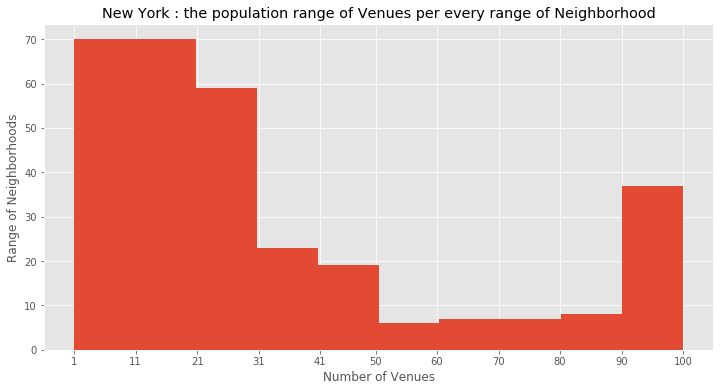

In [113]:
count, bin_edges = np.histogram(newyork_encoded_venues_grouped_sum['Total Venues'])
bin_edges_rounded = np.round(bin_edges)

newyork_encoded_venues_grouped_sum['Total Venues'].plot(kind='hist', 
             figsize=(12, 6), # pass a tuple (x, y) size
             xticks=bin_edges_rounded
             )

plt.title('New York : the population range of Venues per every range of Neighborhood')
plt.xlabel('Number of Venues')
plt.ylabel('Range of Neighborhoods')

plt.show()

#### Distribution of neighborhoods' numbers of bars & clubs in New York

In [114]:
newyork_bar_club_dist = newyork_encoded_venues_grouped_sum['Bars and Clubs'].value_counts(sort=False)

In [115]:
newyork_bar_club_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_bar_club',
                         xTitle='Number of Bars and Clubs', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Bars and Clubs per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of restaurants in New York

In [116]:
newyork_restaurant_dist = newyork_encoded_venues_grouped_sum['Restaurants'].value_counts(sort=False)

In [117]:
newyork_restaurant_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_restaurant',
                         xTitle='Number of Restaurants', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Restaurants per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of services venues in New York

In [118]:
newyork_service_dist = newyork_encoded_venues_grouped_sum['Services'].value_counts(sort=False)

In [119]:
newyork_service_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_services',
                         xTitle='Number of Services venues', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Services venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of leisure & sports venues in New York

In [120]:
newyork_leisure_sport_dist = newyork_encoded_venues_grouped_sum['Leisure and Sports'].value_counts(sort=False)

In [121]:
newyork_leisure_sport_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_leisure_sport',
                         xTitle='Number of Leisure & Sports venues', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Venues for Leisure and Sports per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of Educational & Cultural venues in New York

In [122]:
newyork_education_culture_dist = newyork_encoded_venues_grouped_sum['Education and Culture'].value_counts(sort=False)

In [123]:
newyork_education_culture_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_education_culture',
                         xTitle='Number of Educational & Cultural venues', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Educational and Cultural venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of nature & parks venues in New York

In [124]:
newyork_nature_park_dist = newyork_encoded_venues_grouped_sum['Nature and Parks'].value_counts(sort=False)

In [125]:
newyork_nature_park_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_nature_park',
                         xTitle='Number of Natural venues', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Natural venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of transports & infrastructures venues in New York

In [126]:
newyork_transportation_dist = newyork_encoded_venues_grouped_sum['Transportation'].value_counts(sort=False)

In [127]:
newyork_transportation_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_transportation',
                         xTitle='Number of Transports and infrastructures venues', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Transports and infrastructures venues per every range of Neighborhood')

#### Distribution of neighborhoods' numbers of residentials in New York

In [128]:
newyork_residential_dist = newyork_encoded_venues_grouped_sum['Residential'].value_counts(sort=False)

In [129]:
newyork_residential_dist.iplot(kind='bar', color="#3F51AB", filename='newyork_distribution_residential',
                         xTitle='Number of Residentials', yTitle='Number of Neighborhoods',
                         title='New York : the population range of Residentials per every range of Neighborhood')

### New york neighborhoods Clustering 

In [130]:
newyork_encoded_venues_grouped_mean.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,Bronx,Allerton,0.218750,0.312500,0.312500,0.0625,0.000,0.000000,0.062500,0.03125
1,Bronx,Baychester,0.100000,0.350000,0.450000,0.1000,0.000,0.000000,0.000000,0.00000
2,Bronx,Bedford Park,0.230769,0.435897,0.230769,0.0000,0.000,0.025641,0.076923,0.00000
3,Bronx,Belmont,0.250000,0.440000,0.270000,0.0000,0.010,0.020000,0.010000,0.00000
4,Bronx,Bronxdale,0.187500,0.437500,0.187500,0.0625,0.125,0.000000,0.000000,0.00000


In [132]:
newyork_encoded_venues_grouped_mean.shape

(306, 10)

In [133]:
newyork_encoded_venues_clustering = newyork_encoded_venues_grouped_mean.drop(['Borough', 'Neighborhood'], axis=1)

In [134]:
newyork_encoded_venues_clustering.shape

(306, 8)

In [135]:
newyork_encoded_venues_clustering.head()

,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential
0,0.218750,0.312500,0.312500,0.0625,0.000,0.000000,0.062500,0.03125
1,0.100000,0.350000,0.450000,0.1000,0.000,0.000000,0.000000,0.00000
2,0.230769,0.435897,0.230769,0.0000,0.000,0.025641,0.076923,0.00000
3,0.250000,0.440000,0.270000,0.0000,0.010,0.020000,0.010000,0.00000
4,0.187500,0.437500,0.187500,0.0625,0.125,0.000000,0.000000,0.00000


In [136]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_encoded_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([0, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 2, 0, 3, 0, 2, 4, 0, 0, 3, 0,
       3, 2, 0, 0, 3, 0, 3, 0, 2, 3, 0, 3, 0, 0, 0, 3, 0, 1, 3, 0, 1, 2,
       3, 3, 2, 2, 4, 0, 2, 2, 3, 3, 2, 3, 4, 0, 0, 3, 2, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 0, 3, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 3, 3, 3, 0, 2, 0,
       3, 2, 0, 0, 0, 2, 2, 3, 4, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 0, 0, 0,
       2, 3, 0, 3, 3, 0, 0, 0, 2, 2, 2, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 3, 2, 3, 3, 4, 0, 4, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 0, 0, 0, 3, 1, 2, 0, 2, 3, 0, 1, 2,
       2, 2, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 3, 0, 4, 3, 0, 3, 3, 0, 0, 3, 2, 1, 0, 3, 3, 1, 3, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 2, 1, 4, 2, 0, 3, 0, 3, 3, 0, 2, 2,
       3, 3, 0, 4, 3, 0, 4, 3, 4, 3, 0, 4, 3, 4, 0, 0, 2, 3, 1, 4, 4, 3,
       0, 3, 2, 4, 0, 4, 2, 2, 3, 2, 0, 4, 3, 3, 0, 4, 0, 4, 0, 2, 0, 3,
       4, 2, 2, 3, 0, 0, 2, 3, 4, 3, 3, 0, 1, 3, 0,

In [137]:
# add clustering labels
newyork_encoded_venues_merged = newyork_encoded_venues_grouped_mean
newyork_encoded_venues_merged['Cluster Labels'] = kmeans.labels_

columns_merged = ["Borough", "Neighborhood", "Latitude", "Longitude", "Cluster Labels", 
 "Bars and Clubs", "Restaurants", "Services", "Leisure and Sports", "Education and Culture", 
 "Nature and Parks", "Transportation", "Residential"]

# Merge
newyork_encoded_venues_merged = newyork_encoded_venues_merged.join(newyork_neighborhoods.set_index(
                                                          ["Borough", "Neighborhood"]), 
                                                       on=["Borough", "Neighborhood"])

newyork_encoded_venues_merged.sort_values(['Borough', 'Neighborhood']).reset_index(drop=True).head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
0,Bronx,Allerton,0.218750,0.312500,0.312500,0.0625,0.000,0.000000,0.062500,0.03125,0,40.865788,-73.859319
1,Bronx,Baychester,0.100000,0.350000,0.450000,0.1000,0.000,0.000000,0.000000,0.00000,0,40.866858,-73.835798
2,Bronx,Bedford Park,0.230769,0.435897,0.230769,0.0000,0.000,0.025641,0.076923,0.00000,3,40.870185,-73.885512
3,Bronx,Belmont,0.250000,0.440000,0.270000,0.0000,0.010,0.020000,0.010000,0.00000,3,40.857277,-73.888452
4,Bronx,Bronxdale,0.187500,0.437500,0.187500,0.0625,0.125,0.000000,0.000000,0.00000,3,40.852723,-73.861726


In [138]:
newyork_encoded_venues_merged.shape

(306, 13)

### Examine Clusters for New York City

#### Cluster 1

In [139]:
newyork_cluster_1 = newyork_encoded_venues_merged[newyork_encoded_venues_merged['Cluster Labels']==0]
newyork_cluster_1.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
0,Bronx,Allerton,0.218750,0.312500,0.312500,0.062500,0.0,0.000000,0.062500,0.03125,0,40.865788,-73.859319
1,Bronx,Baychester,0.100000,0.350000,0.450000,0.100000,0.0,0.000000,0.000000,0.00000,0,40.866858,-73.835798
5,Bronx,Castle Hill,0.142857,0.285714,0.428571,0.000000,0.0,0.142857,0.000000,0.00000,0,40.819014,-73.848027
7,Bronx,Claremont Village,0.058824,0.352941,0.411765,0.058824,0.0,0.000000,0.117647,0.00000,0,40.831428,-73.901199
9,Bronx,Co-op City,0.058824,0.235294,0.529412,0.058824,0.0,0.000000,0.117647,0.00000,0,40.874294,-73.829939


In [140]:
print("New York Cluster 1 has : {} Neighborhoods".format(newyork_cluster_1.shape[0]))

New York Cluster 1 has : 102 Neighborhoods


#### Cluster 2

In [141]:
newyork_cluster_2 = newyork_encoded_venues_merged[newyork_encoded_venues_merged['Cluster Labels']==1]
newyork_cluster_2.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
8,Bronx,Clason Point,0.0,0.100000,0.100000,0.100000,0.0,0.500000,0.2,0.000000,1,40.806551,-73.854144
39,Bronx,Riverdale,0.1,0.000000,0.200000,0.100000,0.0,0.300000,0.2,0.100000,1,40.890834,-73.912585
42,Bronx,Spuyten Duyvil,0.0,0.222222,0.333333,0.111111,0.0,0.333333,0.0,0.000000,1,40.881395,-73.917190
99,Brooklyn,Mill Island,0.0,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000,1,40.606336,-73.908186
168,Queens,Bayswater,0.0,0.000000,0.000000,0.333333,0.0,0.333333,0.0,0.333333,1,40.611322,-73.765968


In [142]:
print("New York Cluster 2 has : {} Neighborhoods".format(newyork_cluster_2.shape[0]))

New York Cluster 2 has : 12 Neighborhoods


#### Cluster 3

In [143]:
newyork_cluster_3 = newyork_encoded_venues_merged[newyork_encoded_venues_merged['Cluster Labels']==2]
newyork_cluster_3.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
12,Bronx,Country Club,0.333333,0.166667,0.166667,0.166667,0.0,0.000000,0.0,0.166667,2,40.844246,-73.824099
16,Bronx,Edgewater Park,0.454545,0.409091,0.045455,0.045455,0.0,0.045455,0.0,0.000000,2,40.821986,-73.813885
23,Bronx,Longwood,0.428571,0.428571,0.142857,0.000000,0.0,0.000000,0.0,0.000000,2,40.815099,-73.895788
30,Bronx,Mount Hope,0.400000,0.200000,0.300000,0.000000,0.0,0.000000,0.1,0.000000,2,40.848842,-73.908299
43,Bronx,Throgs Neck,0.583333,0.333333,0.000000,0.083333,0.0,0.000000,0.0,0.000000,2,40.815109,-73.816350


In [144]:
print("New York Cluster 3 has : {} Neighborhoods".format(newyork_cluster_3.shape[0]))

New York Cluster 3 has : 50 Neighborhoods


#### Cluster 4

In [145]:
newyork_cluster_4 = newyork_encoded_venues_merged[newyork_encoded_venues_merged['Cluster Labels']==3]
newyork_cluster_4.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
2,Bronx,Bedford Park,0.230769,0.435897,0.230769,0.000000,0.000000,0.025641,0.076923,0.0,3,40.870185,-73.885512
3,Bronx,Belmont,0.250000,0.440000,0.270000,0.000000,0.010000,0.020000,0.010000,0.0,3,40.857277,-73.888452
4,Bronx,Bronxdale,0.187500,0.437500,0.187500,0.062500,0.125000,0.000000,0.000000,0.0,3,40.852723,-73.861726
6,Bronx,City Island,0.095238,0.380952,0.238095,0.000000,0.095238,0.047619,0.142857,0.0,3,40.847247,-73.786488
14,Bronx,Eastchester,0.181818,0.409091,0.090909,0.045455,0.000000,0.000000,0.272727,0.0,3,40.887556,-73.827806


In [146]:
print("New York Cluster 4 has : {} Neighborhoods".format(newyork_cluster_4.shape[0]))

New York Cluster 4 has : 118 Neighborhoods


#### Cluster 5

In [147]:
newyork_cluster_5 = newyork_encoded_venues_merged[newyork_encoded_venues_merged['Cluster Labels']==4]
newyork_cluster_5.head()

,Borough,Neighborhood,Bars and Clubs,Restaurants,Services,Leisure and Sports,Education and Culture,Nature and Parks,Transportation,Residential,Cluster Labels,Latitude,Longitude
17,Bronx,Fieldston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,4,40.895437,-73.905643
48,Bronx,West Farms,0.318182,0.090909,0.136364,0.045455,0.000000,0.045455,0.318182,0.045455,4,40.839475,-73.877745
56,Brooklyn,Bergen Beach,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.166667,4,40.615150,-73.898556
96,Brooklyn,Marine Park,0.250000,0.125000,0.000000,0.625000,0.000000,0.000000,0.000000,0.000000,4,40.609748,-73.931344
150,Manhattan,Roosevelt Island,0.259259,0.111111,0.148148,0.111111,0.037037,0.111111,0.148148,0.074074,4,40.762160,-73.949168


In [148]:
print("New York Cluster 5 has : {} Neighborhoods".format(newyork_cluster_5.shape[0]))

New York Cluster 5 has : 24 Neighborhoods


### Describing distribution of New York's Venus subcategories with Pie Charts

In [149]:
# Columns list
columns_clustering = ["Bars and Clubs", "Restaurants", "Services", "Leisure and Sports",
                      "Education and Culture", "Nature and Parks", "Transportation", "Residential", "Cluster Labels"]

newyork_clusters_dist = newyork_encoded_venues_merged[columns_clustering].groupby("Cluster Labels").mean().T.reset_index(
                                                                                                                    drop=True)
newyork_clusters_dist.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']

newyork_clusters_dist['labels'] = columns_clustering[:-1]

newyork_clusters_dist['colors'] = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', '#81B4B3', '#87CEFA', '#FFD700', '#CECE28']

newyork_clusters_dist

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,labels,colors
0,0.185136,0.040915,0.428240,0.212218,0.175138,Bars and Clubs,#FEBFB3
1,0.246567,0.067788,0.249891,0.418888,0.077074,Restaurants,#E1396C
2,0.393285,0.112719,0.135580,0.214904,0.110676,Services,#96D38C
3,0.058045,0.131920,0.054766,0.054073,0.189391,Leisure and Sports,#D0F9B1
4,0.029001,0.013889,0.030277,0.027315,0.009877,Education and Culture,#81B4B3
5,0.028193,0.531892,0.035882,0.032757,0.050781,Nature and Parks,#87CEFA
6,0.049523,0.055994,0.051336,0.031351,0.337385,Transportation,#FFD700
7,0.010250,0.044883,0.014027,0.008494,0.049679,Residential,#CECE28


In [150]:
newyork_pie_cluster1  = go.Pie(labels=newyork_clusters_dist['labels'], 
                               values=newyork_clusters_dist['Cluster_1'],
                               hoverinfo='label+percent', 
                               textposition=calculateTextpositions(newyork_clusters_dist['Cluster_1']),
                               textfont=dict(size=15),
                               pull=.05,
                               hole=.2,
                               marker=dict(colors=newyork_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))
                               
layout = go.Layout(title='Cluster 1')

fig = go.Figure([newyork_pie_cluster1], layout=layout)

ppy.iplot(fig, filename='newyork_pie_chart_cluster1')

In [151]:
newyork_pie_cluster2 = go.Pie(labels=newyork_clusters_dist['labels'], 
                               values=newyork_clusters_dist['Cluster_2'],
                               hoverinfo='label+percent',
                               textposition=calculateTextpositions(newyork_clusters_dist['Cluster_2']),
                               textfont=dict(size=15),
                               pull=.05,
                               hole=.2,
                               marker=dict(colors=newyork_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))

layout = go.Layout(title='Cluster 2')

fig = go.Figure([newyork_pie_cluster2], layout=layout)

ppy.iplot(fig, filename='newyork_pie_chart_cluster2')

In [152]:
newyork_pie_cluster3 = go.Pie(labels=newyork_clusters_dist['labels'], 
                               values=newyork_clusters_dist['Cluster_3'],
                               hoverinfo='label+percent', 
                               textposition=calculateTextpositions(newyork_clusters_dist['Cluster_3']),
                               textfont=dict(size=15),
                               pull=.05,
                               hole=.2,
                               marker=dict(colors=newyork_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))

layout = go.Layout(title='Cluster 3')

fig = go.Figure([newyork_pie_cluster3], layout=layout)

ppy.iplot(fig, filename='newyork_pie_chart_cluster3')

In [153]:
newyork_pie_cluster4 = go.Pie(labels=newyork_clusters_dist['labels'], 
                               values=newyork_clusters_dist['Cluster_4'],
                               hoverinfo='label+percent', 
                               textposition=calculateTextpositions(newyork_clusters_dist['Cluster_4']),
                               textfont=dict(size=15),
                               pull=.05,
                               hole=.2,
                               marker=dict(colors=newyork_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))

layout = go.Layout(title='Cluster 4')

fig = go.Figure([newyork_pie_cluster4], layout=layout)

ppy.iplot(fig, filename='newyork_pie_chart_cluster4')

In [154]:
newyork_pie_cluster5 = go.Pie(labels=newyork_clusters_dist['labels'], 
                               values=newyork_clusters_dist['Cluster_5'],
                               hoverinfo='label+percent', 
                               textposition=calculateTextpositions(newyork_clusters_dist['Cluster_5']),
                               textfont=dict(size=15),
                               pull=.05,
                               hole=.2,
                               marker=dict(colors=newyork_clusters_dist['colors'],
                                           line=dict(color='#ffffff', width=2)))

layout = go.Layout(title='Cluster 5')

fig = go.Figure([newyork_pie_cluster5], layout=layout)

ppy.iplot(fig, filename='newyork_pie_chart_cluster5')

### New york City Clusters Map

Finally, let's visualize the resulting clusters for New york City.

In [155]:
# create map
map_newyork_clusters = folium.Map(location=[newyork_latitude-0.028, newyork_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i*0.8) for i in colors_array]


map_newyork_clusters.choropleth(
    geo_data=newyork_boroughs_geo,
    fill_color='#8CABD4',
    line_color='White',
    fill_opacity=0.5, 
    line_opacity=0.7,
    line_weight=2,
    legend_name='New York City Boroughs Tabulation Areas',
    reset=True
)

# add markers to the map
for lat, lon, poi, cluster in zip(newyork_encoded_venues_merged['Latitude'], 
                                  newyork_encoded_venues_merged['Longitude'], 
                                  newyork_encoded_venues_merged['Neighborhood'], 
                                  newyork_encoded_venues_merged['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_newyork_clusters)

       
embed_map(map_newyork_clusters, heightVal='825px')